In [3]:
%matplotlib inline
import math
import xml.etree.ElementTree as etree 
from pylab import *

directory="digipen/"
student="S2"
treeSessions = etree.parse(directory+student+"/"+"data_session.xml")
rootSessions=treeSessions.getroot()

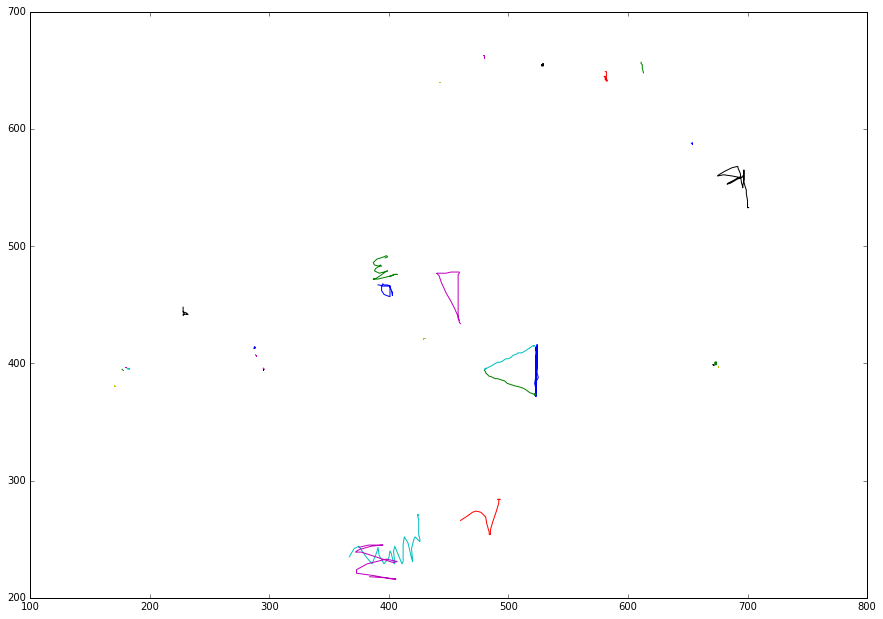

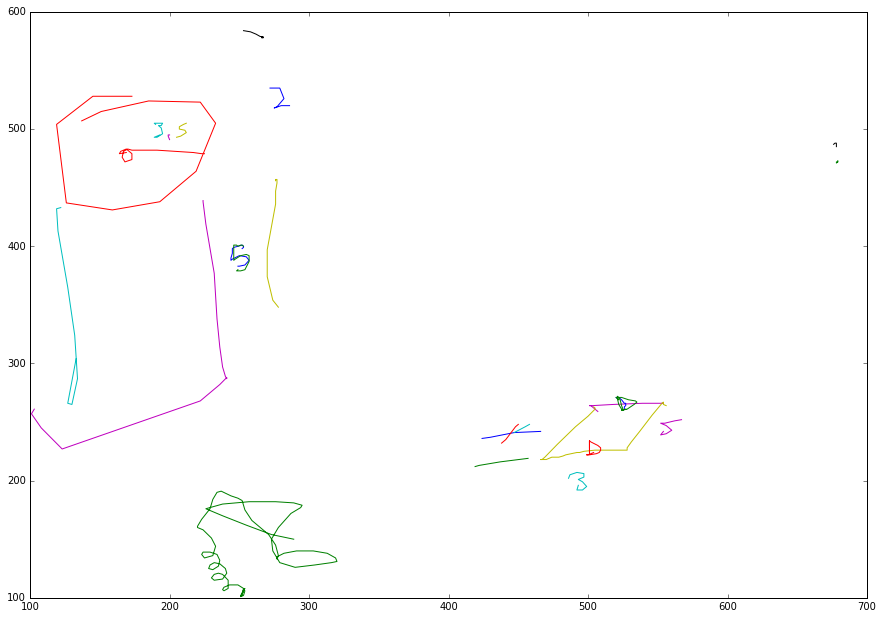

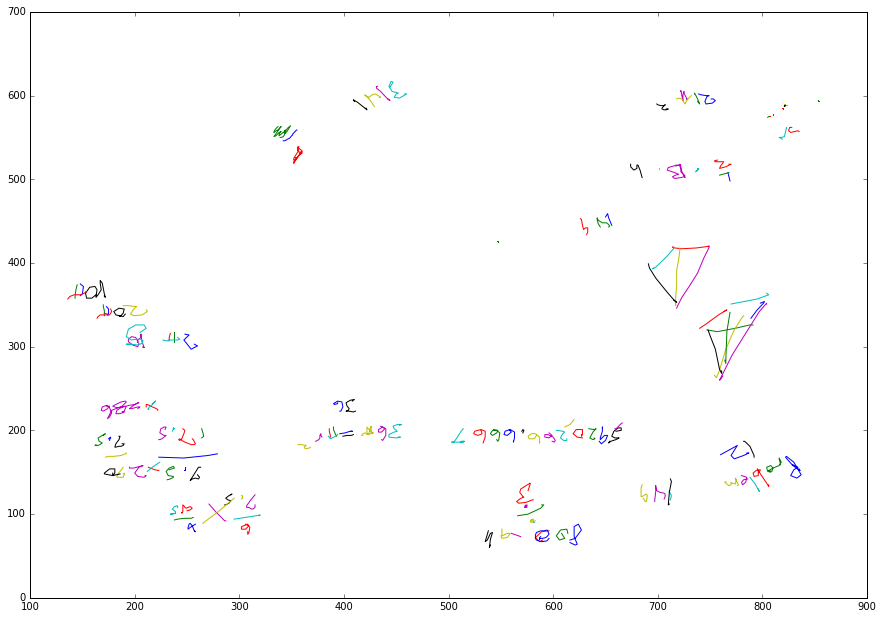

In [5]:
notes = rootSessions[0]
traces =[]
pages = []
for note in notes:
    page=[]
    startime = note.get('starttime')
    endtime = note.get('endtime')
    notefile = note[0].text
    treeNote = etree.parse(directory+student+"/"+notefile)
    rootNote = treeNote.getroot()
    noteinfo = rootNote[0]
    for trace in noteinfo:
        tracedata=[]
        for point in trace:
            pointdata={}
            pointdata["x"] = float(point[0].text)
            pointdata["y"] = float(point[1].text)
            pointdata["timestamp"] = long(point[2].text)
            pointdata["force"] = float(point[3].text)
            tracedata.append(pointdata)
        traces.append(tracedata)
        page.append(tracedata)
    pages.append(page)

for page in pages:
    figure(figsize=(10*1.5,7*1.5))
    for trace in page:
        x =[]
        y=[]
        for point in trace:
            x.append(int(point.get("x")))
            y.append(int(point.get("y")))
        plot(y,x)
    show()

In [6]:
totalStrokes= len(traces)
totalPathLength = 0
totalNumPoints = 0
totalLength = 0
totalAveragePreasure = 0
totalTime = 0

def distance(x1,y1,x2,y2):
    xdistance=x2-x1
    ydistance=y2-y1
    return math.sqrt(xdistance*xdistance+ydistance*ydistance)


for trace in traces:
    totalNumPoints =  totalNumPoints+ len(trace)
    
    firstpoint = trace[0]
    lastpoint = trace[len(trace)-1]
    
    totalLength = totalLength + distance(firstpoint.get("x"),firstpoint.get("y"),lastpoint.get("x"),lastpoint.get("y"))
    
    pathLength =0
    for i in range (0,len(trace)-2):
        currentpoint=trace[i]
        nextpoint=trace[i+1]
        pathLength= pathLength+ distance(currentpoint.get("x"),currentpoint.get("y"),nextpoint.get("x"),nextpoint.get("y"))
    totalPathLength=totalPathLength+pathLength
    
    time = 0
    totalTime=totalTime + lastpoint.get("timestamp")-firstpoint.get("timestamp")

In [6]:
averagePoints = totalNumPoints/float(totalStrokes)
averagePathLength = totalPathLength/float(totalStrokes)
averageLength=totalLength/float(totalStrokes)
averageTime=totalTime/float(totalStrokes)

import csv
with open("results/" +student+ ".csv", 'w') as f:
    writer = csv.writer(f)
    titles= []
    titles.append("Total Strokes")
    titles.append("Total Number of Points")
    titles.append("Total Path Length")
    titles.append("Total Lenglth")
    titles.append("Total Time")
    titles.append("Average Number of Points per Stroke")
    titles.append("Average Path Length per Stroke")
    titles.append("Average Length per Stroke")
    titles.append("Average Time per Stroke")
    writer.writerow(titles)
    
    data=[]
    data.append(totalStrokes)
    data.append(totalNumPoints)
    data.append(totalPathLength)
    data.append(totalLength)
    data.append(totalTime)
    data.append(averagePoints)
    data.append(averagePathLength)
    data.append(averageLength)
    data.append(averageTime)
    writer.writerow(data)
    